 DATASET DETAILS  :                                                                          

The dataset used for this assignment is the IMDB Dataset of 50K Movie Reviews, which contains 50,000 movie reviews along with their corresponding sentiment labels (positive/negative). 
The dataset has been sourced from Kaggle and can be accessed at the following link:
https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [42]:
# ✅ Cell 1: Import Libraries & Load Dataset

import pandas as pd
import numpy as np
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords')

# --- Load IMDB Dataset ---

df = pd.read_csv("dataset_1.csv")

# Display basic info
print("✅ Dataset Loaded Successfully!")
print(f"Shape: {df.shape}")
print(df.head(3))

# Extract corpus (list of reviews)
my_corpus_data = df['review'].astype(str).tolist()
print(f"\nTotal documents in corpus: {len(my_corpus_data)}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\D.S.Abhiram\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\D.S.Abhiram\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\D.S.Abhiram\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\D.S.Abhiram\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


✅ Dataset Loaded Successfully!
Shape: (50000, 2)
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive

Total documents in corpus: 50000


In [43]:
# ✅ Cell 2: Text Preprocessing Function

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # 1️ Lowercasing
    text = text.lower()

    # 2️ Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # 3️Tokenization
    tokens = word_tokenize(text, preserve_line=True)

    # 4️ Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # 5️Lemmatization
    tokens = [lemmatizer.lemmatize(word, pos='v') for word in tokens]

    # 6️ Join tokens back
    return ' '.join(tokens)

# Test preprocessing on a small sample
print("\n🔹 Example preprocessing:")
print("Original:", my_corpus_data[0][:200])
print("Processed:", preprocess_text(my_corpus_data[0][:200]))



🔹 Example preprocessing:
Original: One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me abo
Processed: one reviewers mention watch 1 oz episode youll hook right exactly happen mebr br first thing strike abo


In [44]:
# ✅ Cell 3: Apply Preprocessing to Entire Corpus

print("="*50)
print("Applying Text Preprocessing to IMDB Corpus...")
print("="*50)

# Apply preprocessing to ALL reviews (no slicing)
cleaned_corpus = [preprocess_text(doc) for doc in my_corpus_data]

print("✅ Preprocessing complete!")
print(f"Total cleaned documents: {len(cleaned_corpus)}")
print(f"Sample cleaned review:\n{cleaned_corpus[1][:500]}")


Applying Text Preprocessing to IMDB Corpus...
✅ Preprocessing complete!
Total cleaned documents: 50000
Sample cleaned review:
wonderful little production br br film technique unassuming oldtimebbc fashion give comfort sometimes discomforting sense realism entire piece br br actors extremely well choose michael sheen get polari voice pat truly see seamless edit guide reference williams diary entries well worth watch terrificly write perform piece masterful production one great master comedy life br br realism really come home little things fantasy guard rather use traditional dream techniques remain solid disappear play


In [45]:
# ✅ Cell 4: Enhanced Preprocessing Function

def preprocess_text(text):
    # 1. Lowercasing
    text = text.lower()
    
    # 2. Remove HTML Tags
    text = re.sub(r'<.*?>', '', text)
    
    # 3. Remove URLs
    text = re.sub(r'httpsS?://\\S+|www\\.\\S+', '', text)
    
    # 4. Remove Punctuation and Special Characters
    text = re.sub(r'[^\w\s]', '', text)
    
    # 5. Tokenization
    # --- THIS IS THE FIX ---
    # We add 'preserve_line=True' to stop word_tokenize
    # from calling sent_tokenize (which needs 'punkt').
    tokens = word_tokenize(text, preserve_line=True)
    
    # 6. Stop-Words Removal
    tokens = [word for word in tokens if word not in stop_words]
    
    # 7. Lemmatization
    tokens = [lemmatizer.lemmatize(word, pos='v') for word in tokens]
    
    # We also apply stemming to show the technique
    stemmed_tokens = [stemmer.stem(word) for word in tokens]

    # Return a *joined string* of lemmatized tokens for vectorization
    return ' '.join(tokens), stemmed_tokens

In [46]:
# #Cell 5: NLTK 'punkt' Download Fix

# import nltk
# import os

# # 1. Define a reliable path (e.g., in your user's home folder)
# download_dir = os.path.join(os.path.expanduser('~'), 'my_nltk_data')

# # 2. Create the directory if it doesn't exist
# if not os.path.exists(download_dir):
#     os.makedirs(download_dir)

# # 3. Tell NLTK to download 'punkt' to that specific directory
# print(f"Attempting to download 'punkt' to: {download_dir}")
# nltk.download('punkt', download_dir=download_dir)

# # 4. MOST IMPORTANT: Add this new directory to NLTK's search path
# nltk.data.path.append(download_dir)

# print("\n--- Download complete ---")
# print("NLTK will now look for data in the following paths:")
# print(nltk.data.path)

In [47]:
# ✅ Cell 5: Text Preprocessing and Demonstrative Example

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
import string

# --- Fix for missing resources ---
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords')

# Initialize tools
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# --- Define Preprocessing Function ---
def preprocess_text(text):
    # 1️ Lowercasing
    text = text.lower()
    
    # 2️ Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    
    # 3️ Tokenization
    tokens = word_tokenize(text, preserve_line=True)
    
    # 4️ Stop-word removal
    tokens = [word for word in tokens if word not in stop_words]
    
    # 5️ Lemmatization
    tokens = [lemmatizer.lemmatize(word, pos='v') for word in tokens]
    
    # 6️ Join back into a clean sentence
    return " ".join(tokens)

# --- Demonstrative Example ---
example_text = "The cats were running quickly and happily towards the garden!"
print("Original:", example_text)
print("Preprocessed:", preprocess_text(example_text))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\D.S.Abhiram\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\D.S.Abhiram\AppData\Roaming\nltk_data...


Original: The cats were running quickly and happily towards the garden!
Preprocessed: cat run quickly happily towards garden


[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\D.S.Abhiram\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\D.S.Abhiram\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
# ✅ Cell 6: Bag of Words (BoW) Model

print("="*50)
print("Bag of Words (BoW) Model")
print("="*50)

bow_vectorizer = CountVectorizer(max_features=5000)
bow_matrix = bow_vectorizer.fit_transform(cleaned_corpus)

bow_df = pd.DataFrame(bow_matrix.toarray(), columns=bow_vectorizer.get_feature_names_out())
print("Vocabulary size:", len(bow_vectorizer.get_feature_names_out()))
print("\nSample BoW Table:")
display(bow_df.head())


Bag of Words (BoW) Model
Vocabulary size: 5000

Sample BoW Table:


,10,100,1000,1010,11,110,12,13,13th,14,...,younger,youngest,youre,youth,youve,zero,zombie,zombies,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# ✅ Cell 7: TF-IDF Vectorization

print("="*50)
print("TF-IDF Model")
print("="*50)

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(cleaned_corpus)

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print("Vocabulary size:", len(tfidf_vectorizer.get_feature_names_out()))
print("\nSample TF-IDF Table:")
display(tfidf_df.head())


TF-IDF Model
Vocabulary size: 5000

Sample TF-IDF Table:


,10,100,1000,1010,11,110,12,13,13th,14,...,younger,youngest,youre,youth,youve,zero,zombie,zombies,zone,zoom
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.077241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.079888,0.0,0.0,0.0,0.118186,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [50]:
# ===================================================================
# CELL 8: WORD2VEC MODEL (Part 12)
# ===================================================================
from gensim.models import Word2Vec

print("="*50)
print("Word2Vec Model (CBOW & Skip-Gram)")
print("="*50)

# 1. Prepare input for Word2Vec
tokenized_corpus_for_w2v = [doc.split() for doc in cleaned_corpus]
print(f"Input for Word2Vec (first doc): {tokenized_corpus_for_w2v[0]}\n")

# 2. Train CBOW Model (sg=0)
cbow_model = Word2Vec(tokenized_corpus_for_w2v, vector_size=100, window=5, min_count=1, sg=0)

# 3. Train Skip-gram Model (sg=1)
skipgram_model = Word2Vec(tokenized_corpus_for_w2v, vector_size=100, window=5, min_count=1, sg=1)
        
print("Word2Vec models trained successfully.\n")

# 4. Test Word2Vec
try:
    word1 = 'dollar'
    word2 = 'cents'
    
    cbow_sim = cbow_model.wv.similarity(word1, word2)
    skipgram_sim = skipgram_model.wv.similarity(word1, word2)

    print(f"--- Similarity Test ---")
    print(f"Similarity between '{word1}' and '{word2}' (CBOW): {cbow_sim:.4f}")
    print(f"Similarity between '{word1}' and '{word2}' (Skip-Gram): {skipgram_sim:.4f}")

except KeyError as e:
    print(f"Could not run similarity test: {e}")
    print("This just means one of the test words was not in your corpus.")


Word2Vec Model (CBOW & Skip-Gram)
Input for Word2Vec (first doc): ['one', 'reviewers', 'mention', 'watch', '1', 'oz', 'episode', 'youll', 'hook', 'right', 'exactly', 'happen', 'mebr', 'br', 'first', 'thing', 'strike', 'oz', 'brutality', 'unflinching', 'scenes', 'violence', 'set', 'right', 'word', 'go', 'trust', 'show', 'faint', 'hearted', 'timid', 'show', 'pull', 'punch', 'regard', 'drug', 'sex', 'violence', 'hardcore', 'classic', 'use', 'wordbr', 'br', 'call', 'oz', 'nickname', 'give', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'focus', 'mainly', 'emerald', 'city', 'experimental', 'section', 'prison', 'cells', 'glass', 'front', 'face', 'inwards', 'privacy', 'high', 'agenda', 'em', 'city', 'home', 'manyaryans', 'muslims', 'gangstas', 'latinos', 'christians', 'italians', 'irish', 'moreso', 'scuffle', 'death', 'star', 'dodgy', 'dealings', 'shady', 'agreements', 'never', 'far', 'awaybr', 'br', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 'go', 'show', 'wouldnt', 

📊 Text Analysis and Visualization Outputs

1️⃣ Top 20 Frequent Words (from BoW)



C:\Users\D.S.Abhiram\AppData\Local\Temp\ipykernel_27092\4012498848.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=word_freq.values, y=word_freq.index, palette="viridis")


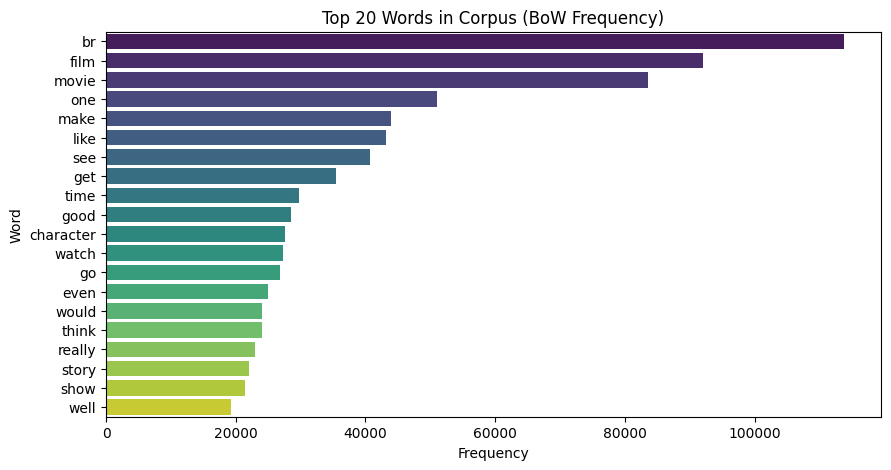


2️⃣ Correlation Heatmap (BoW subset)



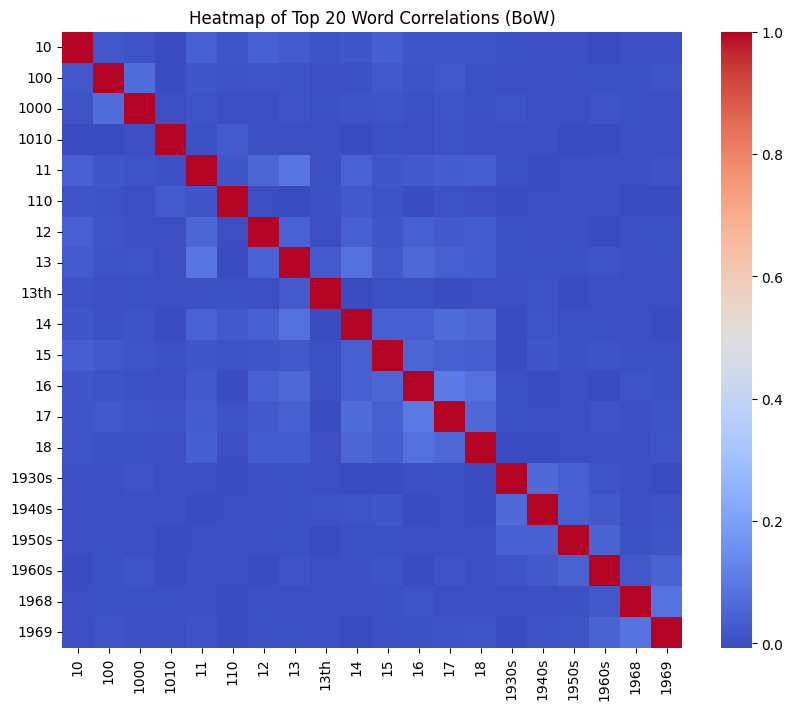


3️⃣ Word2Vec Similarity Heatmap



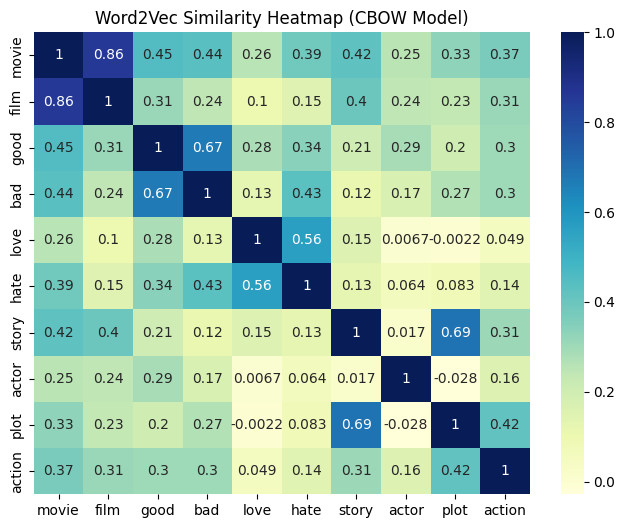


4️⃣ KMeans Clustering on TF-IDF Features

                                              review  cluster
0  One of the other reviewers has mentioned that ...        1
1  A wonderful little production. <br /><br />The...        1
2  I thought this was a wonderful way to spend ti...        1
3  Basically there's a family where a little boy ...        1
4  Petter Mattei's "Love in the Time of Money" is...        1


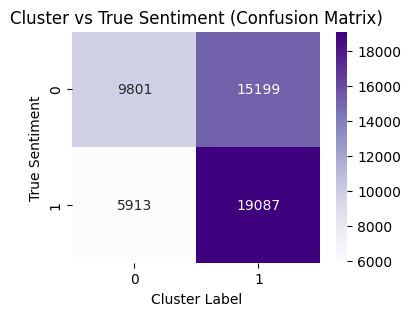

In [51]:
# ===================================================================
# CELL 9: TEXT ANALYSIS & VISUALIZATION OUTPUTS
# ===================================================================
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import numpy as np

print("="*60)
print("📊 Text Analysis and Visualization Outputs")
print("="*60)

# --- 1. Word Frequency Bar Chart (Top 20 Words) ---
print("\n1️⃣ Top 20 Frequent Words (from BoW)\n")
word_freq = bow_df.sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(10,5))
sns.barplot(x=word_freq.values, y=word_freq.index, palette="viridis")
plt.title("Top 20 Words in Corpus (BoW Frequency)")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()

# --- 2. Correlation Heatmap (subset of BoW features) ---
print("\n2️⃣ Correlation Heatmap (BoW subset)\n")
corr_subset = bow_df.iloc[:, :20].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_subset, cmap="coolwarm", annot=False)
plt.title("Heatmap of Top 20 Word Correlations (BoW)")
plt.show()

# --- 3. Word2Vec Similarity Heatmap ---
print("\n3️⃣ Word2Vec Similarity Heatmap\n")

# Select some common words (that exist in your corpus)
sample_words = [w for w in ['movie','film','good','bad','love','hate','story','actor','plot','action'] if w in cbow_model.wv.key_to_index]

if len(sample_words) >= 5:
    sim_matrix = np.zeros((len(sample_words), len(sample_words)))
    for i, w1 in enumerate(sample_words):
        for j, w2 in enumerate(sample_words):
            sim_matrix[i][j] = cbow_model.wv.similarity(w1, w2)
    
    plt.figure(figsize=(8,6))
    sns.heatmap(sim_matrix, xticklabels=sample_words, yticklabels=sample_words, cmap="YlGnBu", annot=True)
    plt.title("Word2Vec Similarity Heatmap (CBOW Model)")
    plt.show()
else:
    print("Not enough common words in vocabulary to plot similarity heatmap.")

# --- 4. KMeans Clustering on TF-IDF Features ---
print("\n4️⃣ KMeans Clustering on TF-IDF Features\n")

kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(tfidf_matrix)

df['cluster'] = cluster_labels
print(df[['review', 'cluster']].head())

# --- Optional Confusion Matrix ---
# (Only if dataset has 'sentiment' column)
if 'sentiment' in df.columns:
    y_true = df['sentiment'].map({'positive':1, 'negative':0}).values
    cm = confusion_matrix(y_true, cluster_labels)

    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
    plt.title("Cluster vs True Sentiment (Confusion Matrix)")
    plt.xlabel("Cluster Label")
    plt.ylabel("True Sentiment")
    plt.show()
else:
    print("\nNo sentiment column found – skipping confusion matrix.")
